
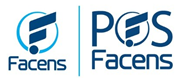

# <center>Especialização em Ciência dos Dados: Aprendizado de Máquina </center>

Instruções para a realização desta atividade:

1. Faça o download deste notebook Jupyter para sua estação de trabalho
2. Realize as atividades solicitadas dentro do notebook, nos espaços apropriados e indicados
3. Salve o notebook no seguinte padrão: <nome_sobrenome_RA>.ipynb (por exemplo: **rodrigo_caropreso_123456.ipynb ** )
4. Envie o notebook com a atividade realizada na sala de aula da disciplina (Google Classroom)

** DATA DE ENTREGA DESTA ATIVIDADE: 01/12/2018 **

** VALOR DESTA ATIVIDADE: 2,0 pontos **


## <center> Exercício 1 - Particle Swarm Optimization </center>

### Otimização é a procura pelo melhor desempenho em direção a um ou alguns pontos que maximiza(m)/minimiza(m) uma função, ou seja, é a busca da melhor solução para um dado problema.

### O Particle Swarm Optimization é um algoritmo que realiza esta busca baseado nos mecanismos de inteligência coletiva e conhecimento adquirido por um grupo de entidades (o enxame).

### Seu funcionamento básico consiste na análise da posição e velocidade de cada partícula do enxame, onde a posição indica uma possível solução e a velocidade é utilizada para realizar o deslocamento de todo o grupo a fim de encontrar soluções cada vez melhores.

### Em termos computacionais, o PSO possui uma estrutura algorítmica conforme o pseudocódigo a seguir:

//Inicialização – Código em Pseudocódigo da Particle Swarm Optimization//
1. Inicialize aleatoriamente as posições $ x_i^k $ e $ v_i^k $ velocidades das partículas.
2. Inicialize $ pbest_i $ e $ gbest_k $  
3. Para cada partícula i, faça as seguintes instruções:  
  //Atualize a melhor posição da partícula atual $ pbest_i $ //    
  Se $ x_i^k > pbest_i $ então      
  >   Para cada dimensão d do problema faça $ pbest_i = x_i^k $  </p>
  
  //Atualiza a melhor partícula//  
  Para cada partícula vizinha, faça  
  >    Se $ pbest_i > gbest_k $ então $ gbest_k = pbest_i $    
  
  //Atualização das posições//      
  Para cada dimensão d do problema faça  
  >    Calcula $ v_i^k+1 $ de acordo com a expressão dada em aula.  
  
  Verifique a condição de **vmax** dada em aula.   
5. Atualize $ x_i^k+1 $ de acordo com a equação vista em aula.  
//Condição de término//  
6. Caso a condição de término não seja satisfeita, volte ao passo 4  

## Um exemplo simples de otimização é a melhoria da imagem das televisões com antena acoplada. Através do ajuste manual da antena, várias soluções são testadas, guiadas pela qualidade de imagem obtida na TV, até a obtenção de uma resposta ótima, ou seja, uma boa imagem.

## Considere então a seguinte função matemática que representa um sinal de TV:  

<p>
<center>
$
    \large f(x) = x \cdot sen (10 \cdot \pi \cdot x) + 1
$
</center>


## Siga as atividades abaixo e construa um algoritmo PSO capaz de otimizar este sinal encontrando seu valor máximo dentro do domínio $ x \in [-1; 2] $

## A função custo f(x) irá variar no intervalo $ y \in [-1; 3] $

# Descrição da partícula

## No contexto desta atividade, cada partícula será descrita como um dicionário python com os seguintes atributos:


> **'X'    : x**     (coordenada X da partícula, e possível valor de solução do problema)  
> **'VX'   : vx**    (velocidade da partícula na direção do eixo x)  
> **'XBest': xbest** (melhor posição da partícula ao longo do tempo)

## Ainda no contexto desta atividade, o conhecimento do grupo (GBest) será modelado como um dicionário python com os seguintes atributos:

> **'XGBest'      : xgb** (coordenada X da melhor posição conhecida por todo o enxame)  
> **'XGBestFitness' : ygb** (valor da função-custo calculado no ponto xgb)

### Importando os módulos necessários

In [161]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Codifique a função custo (fitness) que representa f(x) descrita acima.

In [162]:
#CÉLULA PSO-LIB-01
'''
# Função para cálculo de fitness (aptidão de cada partícula)
# Esta função recebe como parâmetro a coordenada de posição X de uma partícula no formato de dicionário descrito acima e, 
#retorna um valor Y que corresponde ao cálculo de f(x) dado acima.
'''

def fitness(X) :
    #f(x)=x⋅sen(10⋅π⋅x)+1
    #IMPLEMENTE O CÓDIGO AQUI
    Y = X * (np.sin(10*np.pi*X))+1    
    return Y

# Teste - use o código abaixo para validar sua implementação


> p1 = {'X' : 0.,  'VX' :  1., 'XBest':  0.}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}  
> p3 = {'X' : 2.,  'VX' :  2., 'XBest':  2.}  
> print('f(p1)={}; f(p2)={}; f(p3)=-{};'.format(fitness(p1['X']), fitness(p2['X']), fitness(p3['X'])))  

** Valor esperado: ** f(p1)=1.0; f(p2)=0.9999999999999988; f(p3)=-0.9999999999999951;


In [163]:
# teste resposta
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 2.}
print('f(p1)={}; f(p2)={}; f(p3)=-{};'.format(fitness(p1['X']), fitness(p2['X']), fitness(p3['X'])))

f(p1)=1.0; f(p2)=0.9999999999999988; f(p3)=-0.9999999999999951;


## 2 - Codifique o método que plota o gráfico da função custo dentro do domínio do problema, ou seja, o gráfico ( x, f(x) ).

In [222]:
#CÉLULA PSO-LIB-02

'''
Esta função recebe como parâmetros:
P          -> enxame de particulas, uma lista de particulas modeladas conforme o enunciado
generation -> valor da 'geração' ou movimento que as partículas executaram, iniciando em 1.
'''

def plot_population(P, generation):
    
    # IMPLEMENTE O CODIGO
    # 1. DEFINA O DOMINIO DA FUNCAO
    # 2. CALCULE O FITNESS DE TODAS AS PARTICULAS
    # 3. PLOTE O GRAFICO       
    xarry = []
    yarry = []
    for particle in vParticles:
        x = particle['X']
        y = fitness(generation)
        xarry.append(x)
        yarry.append(y)
    
    plt.figure()
    sTitle = ('Populacao na geração {}'.format(generation))
    plt.title(sTitle)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.plot(xarry,yarry,'o')
    

# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  2.}  
> vParticles = [p1, p2, p3]  
> plot_population(vParticles, 1)  

## Valor esperado

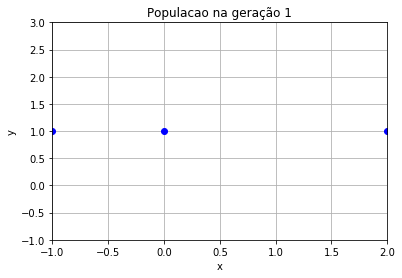


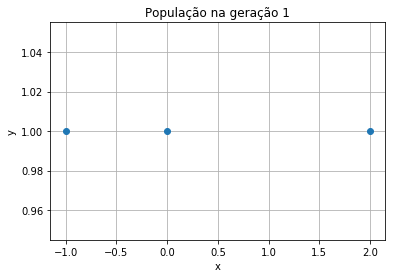

In [165]:
# teste resposta
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 2.}
vParticles = [p1, p2, p3]
plot_population(vParticles, 1)

## 3 - Codifique o método que verifica o valor de pBest, a melhor posição obtida por uma dada partícula.

In [166]:
#CÉLULA PSO-LIB-03

'''
Esta função recebe como parâmetro uma partícula conforme descrita no enunciado do problema.
Ela retorna o valor de XBest, a melhor posição desta partícula.
'''

def calcPBest(particle) :   
    xBest = particle['XBest']
    currentFitness = fitness(particle['X'])     
    
    #IMPLEMENTE O CÓDIGO
    #1. COMPARAÇÃO ENTRE A POSIÇÃO ATUAL E XBEST DA PROPRIA PARTICULA
    if(currentFitness >= fitness(xBest)):
        xBest = currentFitness
  
    return xBest

# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.5}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  1.}  
> vParticles = [p1, p2, p3]  
> print( 'p1: Xbest = {}'.format(calcPBest(p1)))  
> print( 'p2: Xbest = {}'.format(calcPBest(p2)))  
> print( 'p3: Xbest = {}'.format(calcPBest(p3)))  

## Valor esperado
p1: Xbest = 0.5
p2: Xbest = 0.9999999999999988
p3: Xbest = 1.0


In [167]:
#teste resposta
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.5}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 1.}
vParticles = [p1, p2, p3]
print( 'p1: Xbest = {}'.format(calcPBest(p1)))
print( 'p2: Xbest = {}'.format(calcPBest(p2)))
print( 'p3: Xbest = {}'.format(calcPBest(p3)))


p1: Xbest = 0.5
p2: Xbest = 0.9999999999999988
p3: Xbest = 1.0


## 4 - Codifique o método auxiliar que atualiza todos os valores de pBest do enxame.

In [168]:
#CÉLULA PSO-LIB-04

'''
Este método recebe como parâmetro a coleção (lista) que representa todo o enxame de partículas e varre esta lista atualizando
o pBest de cada partícula.

O método retorna uma cópia da lista com os valores de pBest atualizados.
'''

def calcAllPBest(vParticles) :
    vParticlesRet = []
    #IMPLEMENTE O CODIGO
    for particle in vParticles :
        x = particle['X']
        xBest = particle['XBest']
        if (fitness((x)) >= fitness((xBest)) ) :
            particle['XBest'] = x
        
        vParticlesRet.append(particle)

    return vParticlesRet

# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.5}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  1.}  
> vParticles = [p1, p2, p3]  

> vParticles = calcAllPBest(vParticles)  
> print(vParticles)

## Valor esperado
[{'VX': 1.0, 'XBest': 0.5, 'X': 0.0}, {'VX': -1.0, 'XBest': -1.0, 'X': -1.0}, {'VX': 2.0, 'XBest': 1.0, 'X': 2.0}]

In [169]:
#teste respsota
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.5}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 1.}
vParticles = [p1, p2, p3]

vParticles = calcAllPBest(vParticles)
print(vParticles)

[{'X': 0.0, 'VX': 1.0, 'XBest': 0.5}, {'X': -1.0, 'VX': -1.0, 'XBest': -1.0}, {'X': 2.0, 'VX': 2.0, 'XBest': 1.0}]


## 5 - Codifique o método auxiliar que verifica o valor de GBest do enxame.

In [213]:
#CÉLULA PSO-LIB-05

'''
Este método recebe como parâmetro a coleção (lista) que representa todo o enxame de partículas e varre esta lista atualizando
o pBest de cada partícula.

A seguir o método verifica qual é o melhor pBest de todas as particulas e retorna um dicionario com atributos 'XGBest' e 'XGBestFitness',
onde 'XGBest' é a posição da partícula que gerou o melhor custo (fitness) conhecido pelo bando e XGBestFitness é o valor 
do custo calculado para XGBest.
'''

def calcGBest(vParticles) :
    #Inicializa variavel
    calcAllPBest(vParticles)
    x = vParticles[0]['XBest']
    maxFitness = fitness(x)

    #IMPLEMENTE O CÓDIGO
    #PERCORRA A LISTA DE PERTICULAS E VERIFIQUE QUAL O MELHOR XBest neste momento
    #Atualize o dicionario de retorno gBest.
    for particle in vParticles :
        x = particle['XBest']
        currentFitness = fitness((x))
        if ( currentFitness >= maxFitness ) :
            maxFitness = currentFitness
            gBest = {'X' : x, 'XGBestFitness' : maxFitness}
    return gBest

In [214]:
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.5}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 1.}
vParticles = [p1, p2, p3]

gBest = calcGBest(vParticles)
print(gBest)

{'X': 0.5, 'XGBestFitness': 1.0000000000000002}


# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.5}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  1.}  
> vParticles = [p1, p2, p3]  

> gBest = calcGBest(vParticles)  
> print(gBest)

## Valor esperado
{'XGBest': 0.5, 'XGBestFitness': 1.0000000000000002}

# PSO - inicio

In [215]:
#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 20
max_generations = 100

#Limites do dominio de definição
x_min = -1
x_max =  2

y_min = -1
y_max =  3

gBest = {'XGBest' : 0, 'XGBestFitness' : 0}
vParticles = []

deltaT = 1
c1 = 0.3
c2 = 0.6
w  = 0.2

vMax = 0.1 #limitação de velocidade

## 6 - Inicialize o enxame de particulas com posições e velocidades aleatórias e calcule o gBest do enxame, imprimindo seu valor.

In [216]:
#CÉLULA PSO-MAIN-02
#Inicializando população
vParticles=[]

#IMPLEMENTE O CÓDIGO

for i in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'Y' : y, 'XBest' : x, 'VX' : vx  })


#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)


{'X': 1.85673017864965, 'XGBestFitness': 2.8153823020122095}


## 7 - Plote o gráfico do enxame no instante inicial, utilizando valor 1 para o 'generation_index'

In [217]:
#CÉLULA PSO-MAIN-02
#IMPLEMENTE O CÓDIGO
def plot_population2(P, generation):
    
    xmin =-1
    xmax = 2.1
    ymin =-1
    ymax = 3.1
    
    xAxis = []
    yAxis = []
    for individual in P : #pega os individuos na população        
        x = individual['X']
        y = individual['Y']
        xAxis.append(x)
        yAxis.append(y)
    
    plt.figure()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    sTitle = ('Populacao na geração {}'.format(generation))
    plt.title(sTitle)
    plt.grid()
    plt.plot(xAxis, yAxis, 'o')
    
    
  

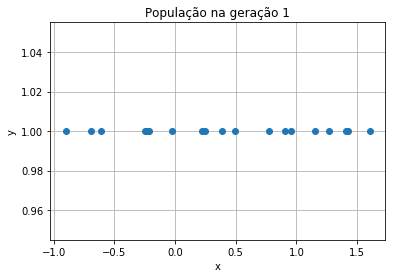

In [209]:
generation_index = 1
plot_population(vParticles, generation_index)

## 8 - Complete a implementação da função abaixo, que contém o núcleo do algoritmo PSO

In [218]:
#CÉLULA PSO-MAIN-03

'''
Esta função recebe como parâmetro a lista do enxame de partículas, conforme definido nas funções anteriores, e executa uma 
iteração do algoritmo PSO, retornando uma nova lista atualizada com todas as partículas.
'''


def runEpoch(vParticles) :
    #Atualizando vetor de velocidades
    r1 = np.random.random()
    r2 = np.random.random()
    
    x_min = -1
    x_max =  2
    y_min = -1
    y_max =  3

    #IMPLEMENTE O CODIGO:
    # 1. Para cada particula:
    #   1.1 Atualize seu pBest
    #   1.2 Atualize o GBest do bando
    #   1.3 Calcule a nova velocidade
    #   1.4 Verifique os limites de velocidade [-VMax, VMax]
    #   1.5 Atualize a velocidade da particula
    #   1.6 Calcule a nova posição da particula
    #   1.7 Atualize a posição da particula 
    #   1.8 Adicione a particula atualizada na lista de retorno
    # 2. Retorne a lista atualizada
    
      
    for particle in vParticles :
        #print(particle)
        #Atualiza pbest
        (xBest) = calcPBest(particle)
        particle['XBest'] = xBest
        
        #Atualiza gbest
        gBest = calcGBest(vParticles)
        
        #Atualiza velocidade de uma particula
        newVX = w*particle['VX'] + c1*r1*(particle['XBest'] - particle['X']) + c2*r2*(gBest['X'] - particle['X'])
        
        #Verifica limite de velocidade
        if (newVX <= -vMax ) :
            newVX = -vMax

        if (newVX >= vMax ) :
            newVX = vMax

        #Atualiza a velocidade da particula
        particle['VX'] = newVX

        #Atualiza a posição da particula
        newX = particle['X'] + newVX * deltaT
        particle['X'] = newX
       
    return vParticles

## 9 - Execute a célula abaixo para verificar se o algoritmo PSO apresenta convergência.

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


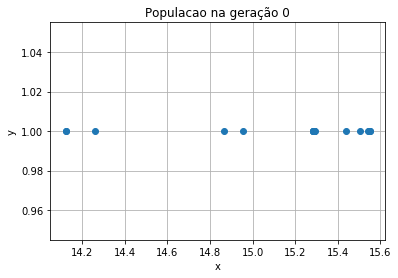

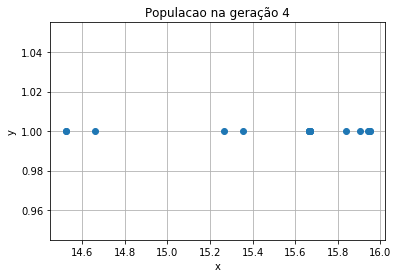

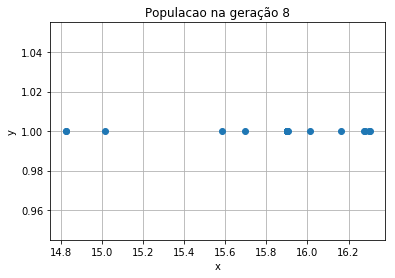

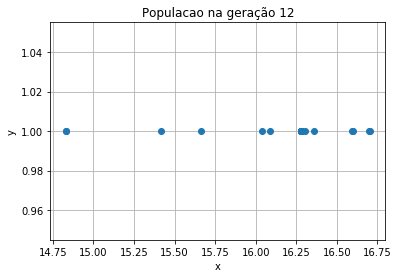

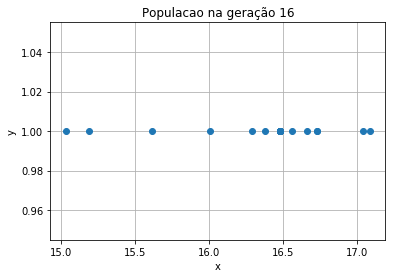

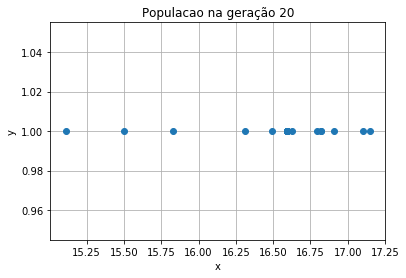

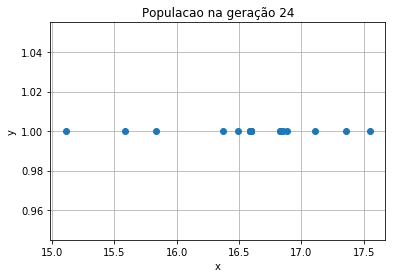

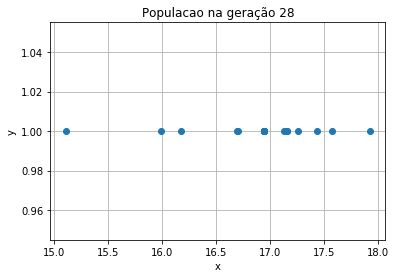

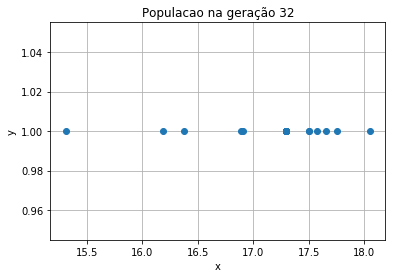

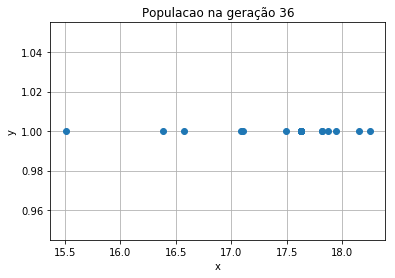

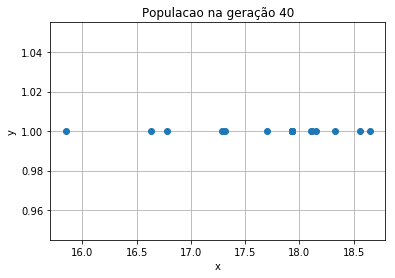

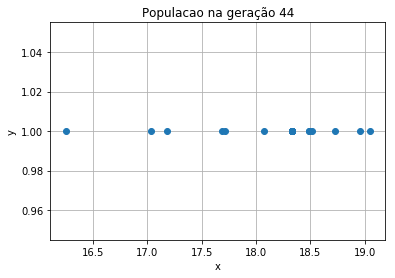

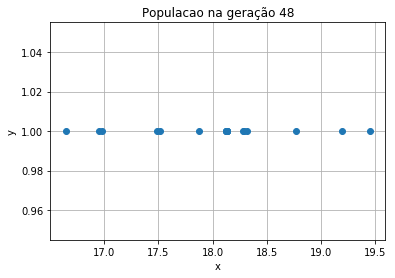

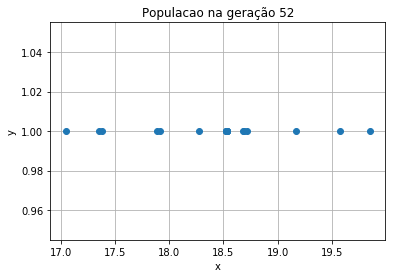

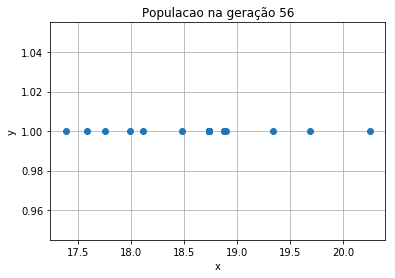

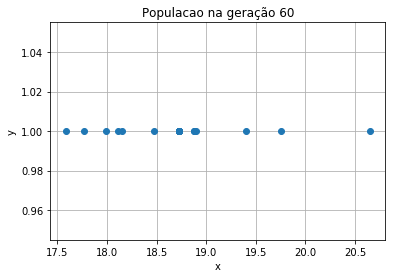

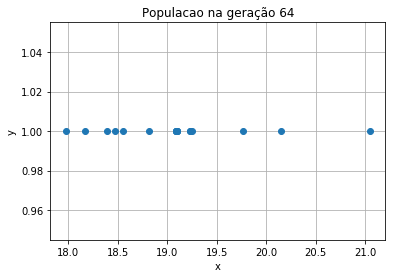

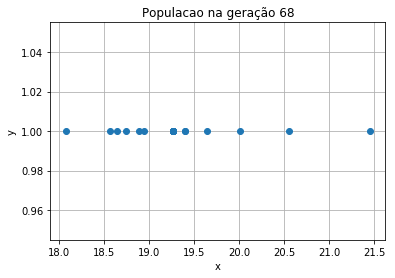

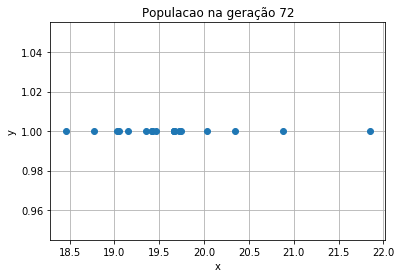

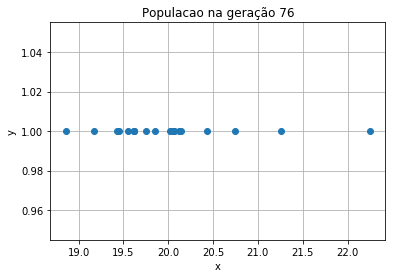

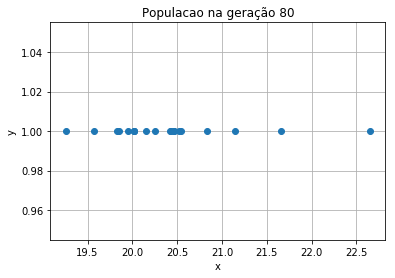

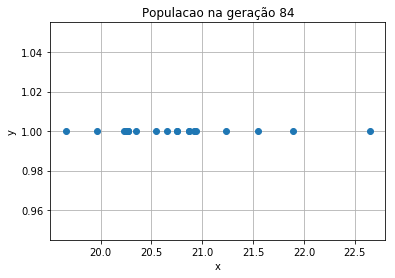

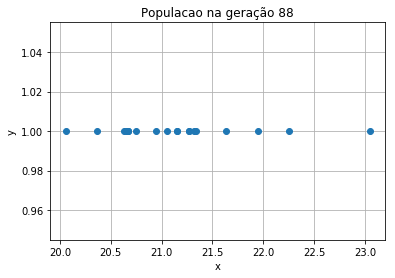

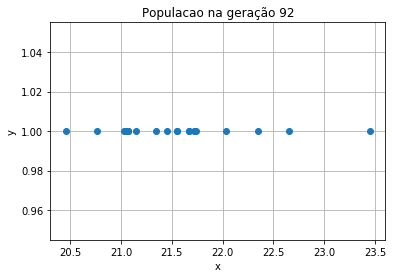

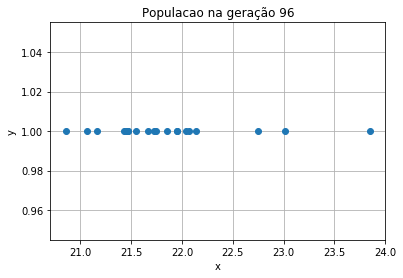

In [227]:
#CÉLULA PSO-MAIN-04
#Loop principal
generation_index = 0
for generation_index in range(0, max_generations) :
        
    if(generation_index % 4 == 0) :
        plot_population(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)
                
#print(generation_index)

#print(vParticles)

## Validação

### Execute o algoritmo e Observe se ocorre convergência. Utilize o código abaixo para determinar a solução.

A convergencia foi atingida na geração: 99
A particula vencedora foi: {'X': 16.045107084480236, 'XGBestFitness': 16.855919560254065}, com aptidão 16.855919560254065
A solução do problema é x=16.045107084480236


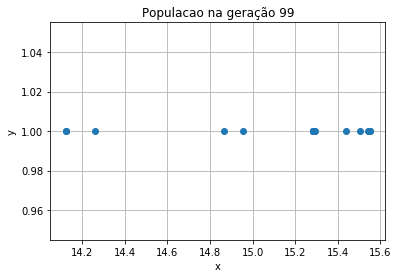

In [226]:
#CÉLULA PSO-MAIN-05
#Verificando os resultados
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XGBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population(vParticles, generation_index)

# Bônus Stage: exercite os parâmetros do modelo.

## Verifique o que acontece com a convergência, caso você modifique a velocidade limite v_max (v_max = 0.003, por exemplo)

## Verifique o que acontece com a convergência, caso você reduza o tamanho da população (20 ou 30 particulas).

## Verifique o que acontece com a convergência, caso você reduza a quantidade de épocas de atualização.

## Verifique o que acontece com a convergência, caso você AUMENTE as constantes c1, c2 e w.

## Verifique o que acontece com a convergência, fazendo w=0. O que isso significa?

## Verifique o que acontece com a convergência, caso você faça c1 muito maior que c2 (c1 >> c2).

## Verifique o que acontece com a convergência, caso você faça c1 muito menor que c2 (c1 << c2).